In [ ]:
 import numpy as np# used to work with array
import pandas as pd# used to create the arrays data into a structed tabular form | in background it uses numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')# to connect with google drive

Mounted at /content/drive


load train and test **data**

In [ ]:
merch=pd.read_csv('/content/drive/MyDrive/mith121/train_data/train_merchant_data.csv')

In [ ]:
merch_test=pd.read_csv('/content/drive/MyDrive/mith121/test_data/test_merchant_data.csv')

In [ ]:

orders=pd.read_csv('/content/drive/MyDrive/mith121/train_data/train_order_data.csv')

In [ ]:
orders_test=pd.read_csv('/content/drive/MyDrive/mith121/test_data/test_order_data.csv')

In [ ]:
target=pd.read_csv('/content/drive/MyDrive/mith121/train_data/train.csv')

In [ ]:
test_trarget=pd.read_csv('/content/drive/MyDrive/mith121/test_data/test.csv')

In [ ]:
print(test_trarget.shape)
print(orders_test.shape)
print(merch_test.shape)

(13554, 1)
(13554, 7)
(13554, 7)


In [ ]:
ip_addres=pd.read_csv('/content/drive/MyDrive/mith121/train_data/ip_boundaries_countries.csv')

In [ ]:
print(merch.shape)
print(ip_addres.shape)
print(orders.shape)
print(target.shape)

(54213, 7)
(138846, 3)
(54213, 7)
(54213, 2)


In [ ]:
ip_addres



,lower_bound_ip_address,upper_bound_ip_address,country
0,1.0.0.0,1.0.0.255,Australia
1,1.0.1.0,1.0.1.255,China
2,1.0.2.0,1.0.3.255,China
3,1.0.4.0,1.0.7.255,Australia
4,1.0.8.0,1.0.15.255,China
...,...,...,...
138841,223.255.240.0,223.255.243.255,Hong Kong
138842,223.255.244.0,223.255.247.255,India
138843,223.255.252.0,223.255.253.255,China
138844,223.255.254.0,223.255.254.255,Singapore


In [ ]:
ip_addres['country'].value_counts()

United States                            46868
Canada                                    6989
Russian Federation                        6739
Australia                                 6316
Germany                                   5999
                                         ...  
Timor-leste                                  1
Korea Democratic People's Republic of        1
St. Pierre and Miquelon                      1
Tokelau                                      1
Saint Lucia                                  1
Name: country, Length: 235, dtype: int64

In [ ]:
ip_addres['country'].unique()

array(['Australia', 'China', 'Japan', 'Thailand', 'India', 'Malaysia',
       'Korea Republic of', 'Hong Kong',
       'Taiwan; Republic of China (ROC)', 'Philippines', 'Viet Nam',
       'France', 'European Union', 'United Kingdom', 'Italy',
       'United Arab Emirates', 'Israel', 'Ukraine', 'Russian Federation',
       'Sweden', 'Kazakhstan', 'Portugal', 'Greece', 'Saudi Arabia',
       'Denmark', 'Spain', 'Iran (ISLAMIC Republic Of)', 'Norway',
       'Germany', 'United States', 'Syrian Arab Republic', 'Cyprus',
       'Czech Republic', 'Switzerland', 'Iraq', 'Netherlands', 'Turkey',
       'Romania', 'Lebanon', 'Hungary', 'Georgia', 'Azerbaijan',
       'Austria', 'Palestinian Territory Occupied', 'Lithuania', 'Oman',
       'Serbia', 'Finland', 'Belgium', 'Bulgaria', 'Slovenia',
       'Moldova Republic of', 'Macedonia', 'Estonia', 'Liechtenstein',
       'Croatia (LOCAL Name: Hrvatska)', 'Poland',
       'Bosnia and Herzegowina', 'Latvia', 'Jordan', 'Kyrgyzstan',
       'Ireland

In [ ]:
ip_addres['country'].unique()

array(['Australia', 'China', 'Japan', 'Thailand', 'India', 'Malaysia',
       'Korea Republic of', 'Hong Kong',
       'Taiwan; Republic of China (ROC)', 'Philippines', 'Viet Nam',
       'France', 'European Union', 'United Kingdom', 'Italy',
       'United Arab Emirates', 'Israel', 'Ukraine', 'Russian Federation',
       'Sweden', 'Kazakhstan', 'Portugal', 'Greece', 'Saudi Arabia',
       'Denmark', 'Spain', 'Iran (ISLAMIC Republic Of)', 'Norway',
       'Germany', 'United States', 'Syrian Arab Republic', 'Cyprus',
       'Czech Republic', 'Switzerland', 'Iraq', 'Netherlands', 'Turkey',
       'Romania', 'Lebanon', 'Hungary', 'Georgia', 'Azerbaijan',
       'Austria', 'Palestinian Territory Occupied', 'Lithuania', 'Oman',
       'Serbia', 'Finland', 'Belgium', 'Bulgaria', 'Slovenia',
       'Moldova Republic of', 'Macedonia', 'Estonia', 'Liechtenstein',
       'Croatia (LOCAL Name: Hrvatska)', 'Poland',
       'Bosnia and Herzegowina', 'Latvia', 'Jordan', 'Kyrgyzstan',
       'Ireland

In [ ]:
pie_chat(ip_addres,10,cols='country')# we can oberve that more transctions are happened with crdit card

NameError: ignored

In [ ]:
target

,Merchant_ID,Fraudster
0,221592,0
1,316935,1
2,38454,1
3,214437,1
4,296240,1
...,...,...
54208,243300,0
54209,219957,0
54210,101017,0
54211,50557,0


**merge all the different csv file 
and make that into a single train and test file**

In [ ]:
df=pd.merge(orders,target,on='Merchant_ID',how='left')

In [ ]:
print(test_trarget.shape)
print(orders_test.shape)
print(merch_test.shape)

(13554, 1)
(13554, 7)
(13554, 7)


In [ ]:
test_df=pd.merge(orders_test,test_trarget,on='Merchant_ID',how='left')

In [ ]:
df

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Fraudster
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,0
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,0
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,1
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,0
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,0
...,...,...,...,...,...,...,...,...
54208,143943,4b0857877884,2018-06-01 14:39:47,90,Ads,Credit Card,61951,0
54209,125429,2de2749f5442,2018-08-05 21:58:02,120,SEO,Debit Card,328145,0
54210,159393,11635fac40ff,2018-06-23 01:54:24,92,Ads,Credit Card,28307,0
54211,133631,6bbcff2f14e5,2018-06-15 21:54:36,148,Ads,Cash On Delivery,277466,0


check null values after merging if having more null values means that merging not happen correctly

In [ ]:
df.isna().sum(axis=0)

Customer_ID             0
Order_ID                0
Date_of_Order           0
Order_Value_USD         0
Order_Source            0
Order_Payment_Method    0
Merchant_ID             0
Fraudster               0
dtype: int64

In [ ]:
train=pd.merge(df,merch,on='Merchant_ID',how='left')

In [ ]:
print(test_trarget.shape)
print(orders_test.shape)
print(merch_test.shape)

(13554, 1)
(13554, 7)
(13554, 7)


In [ ]:
test=pd.merge(test_df,merch_test,on='Merchant_ID',how='left')

In [ ]:
test

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,53637,1746213,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62
1,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,243517,1746213,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87
2,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,343640,1746213,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255
3,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,69889,1746213,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185
4,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,125706,1746213,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13549,153457,f0caea3c0bbb,2018-06-25 23:00:41,92,SEO,Credit Card,279884,1746213,2018-04-21 03:10:18,JNYAWEFRSBGCK,M,20,164.83.157.213
13550,139271,a23964a17f12,2018-07-14 19:20:44,128,SEO,Internet Banking,206253,1746213,2018-06-10 11:16:31,HYEKCYQYSPVIO,F,30,40.46.42.142
13551,156228,28e0b6aa4aca,2018-03-05 12:08:52,98,Direct,E-wallet,313049,1746213,2018-02-27 00:55:48,OVSRMAXBANHKT,F,44,210.44.212.84
13552,160078,3e1d365937d6,2018-05-22 18:30:43,68,SEO,Debit Card,304081,1746213,2018-05-20 12:17:43,STSCTKTROPBTH,F,39,46.244.39.59


In [ ]:
train

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,0,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,0,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,1,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,130.243.149.190
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,0,1746213,2018-08-17 01:52:14,ZPJCMOXVRXVJF,M,37,48.250.147.203
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,0,1746213,2018-05-26 11:58:33,NVDDVXILKZTVO,F,26,212.167.41.153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54208,143943,4b0857877884,2018-06-01 14:39:47,90,Ads,Credit Card,61951,0,1746213,2018-05-18 15:56:52,CBVSANBQRHOXH,F,21,85.11.23.249
54209,125429,2de2749f5442,2018-08-05 21:58:02,120,SEO,Debit Card,328145,0,1746213,2018-07-19 14:11:54,CAMZAFNRIHGNJ,F,24,139.57.167.53
54210,159393,11635fac40ff,2018-06-23 01:54:24,92,Ads,Credit Card,28307,0,1746213,2018-03-09 05:11:15,VYAOKZGMMJDYL,F,22,63.100.37.5
54211,133631,6bbcff2f14e5,2018-06-15 21:54:36,148,Ads,Cash On Delivery,277466,0,1746213,2018-04-19 11:40:47,NSKUWQPWMQMJB,M,28,205.61.122.177


In [ ]:
train.columns# check number of columns

Index(['Customer_ID', 'Order_ID', 'Date_of_Order', 'Order_Value_USD',
       'Order_Source', 'Order_Payment_Method', 'Merchant_ID', 'Fraudster',
       'Ecommerce_Provider_ID', 'Merchant_Registration_Date',
       'Registered_Device_ID', 'Gender', 'Age', 'IP_Address'],
      dtype='object')

In [ ]:
train.isna().sum(axis=0)# check null values in train dataset

Customer_ID                   0
Order_ID                      0
Date_of_Order                 0
Order_Value_USD               0
Order_Source                  0
Order_Payment_Method          0
Merchant_ID                   0
Fraudster                     0
Ecommerce_Provider_ID         0
Merchant_Registration_Date    0
Registered_Device_ID          0
Gender                        0
Age                           0
IP_Address                    0
dtype: int64

In [ ]:
test.isna().sum(axis=0)#checking test null values

Customer_ID                   0
Order_ID                      0
Date_of_Order                 0
Order_Value_USD               0
Order_Source                  0
Order_Payment_Method          0
Merchant_ID                   0
Ecommerce_Provider_ID         0
Merchant_Registration_Date    0
Registered_Device_ID          0
Gender                        0
Age                           0
IP_Address                    0
dtype: int64

In [ ]:
train.dtypes# check data types

Customer_ID                    int64
Order_ID                      object
Date_of_Order                 object
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
Merchant_ID                    int64
Fraudster                      int64
Ecommerce_Provider_ID          int64
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
dtype: object

In [ ]:
import ipaddress

def ip_to_integer(string_ip):
    try:
        if type(ipaddress.ip_address(string_ip)) is ipaddress.IPv4Address:
            return int(ipaddress.IPv4Address(string_ip))
        if type(ipaddress.ip_address(string_ip)) is ipaddress.IPv6Address:
            return int(ipaddress.IPv6Address(string_ip))
    except Exception as e:
        return -1

In [ ]:
array=train['IP_Address'].to_numpy()

In [ ]:
array

array(['37.113.112.143', '190.255.172.133', '130.243.149.190', ...,
       '63.100.37.5', '205.61.122.177', '101.117.243.126'], dtype=object)

In [ ]:
type(array)

numpy.ndarray

In [ ]:
lp=list(map(ip_to_integer,ip_addres['lower_bound_ip_address']))

In [ ]:
#lp

In [ ]:
ip_addres

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.0.0.0,1.0.0.255,Australia
1,1.0.1.0,1.0.1.255,China
2,1.0.2.0,1.0.3.255,China
3,1.0.4.0,1.0.7.255,Australia
4,1.0.8.0,1.0.15.255,China
...,...,...,...
138841,223.255.240.0,223.255.243.255,Hong Kong
138842,223.255.244.0,223.255.247.255,India
138843,223.255.252.0,223.255.253.255,China
138844,223.255.254.0,223.255.254.255,Singapore


In [ ]:
df = pd.DataFrame(lp)
df

,0
0,16777216
1,16777472
2,16777728
3,16778240
4,16779264
...,...
138841,3758092288
138842,3758093312
138843,3758095360
138844,3758095872


In [ ]:
# defing function that give output of pie chart
def pie_chat(data,df,cols=None):
  import matplotlib.pyplot as plt
  data_name=data[cols].value_counts().index
  data_value=data[cols].value_counts().values

   #"df refers to how many number of classes do you want to show"
   #used for one categorical

  plt.pie(data_value[:df],labels=data_name[:df],autopct="%1.2f%%")


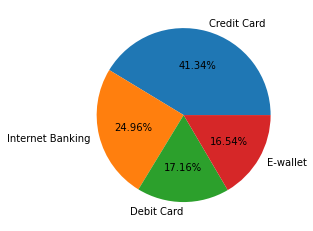

In [ ]:
pie_chat(train,4,cols='Order_Payment_Method')# we can oberve that more transctions are happened with crdit card

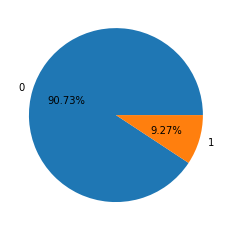

In [ ]:
pie_chat(train,4,cols='Fraudster')# we can oberve that more transctions are happened with crdit card

In [ ]:
def bar_plot(data,cat_cols,num_cols):

   import matplotlib.pyplot as plt
   plt.bar(data[cat_cols],data[num_cols],color='maroon',width=0.4)

# its needs one categorical and numerical
   plt.xlabel(cat_cols)
   plt.ylabel(num_cols)



In [ ]:
def countplot(data,cat_cols):
  import seaborn as sns
  # for the plotting of the categorical data
  sns.countplot(data[cat_cols])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


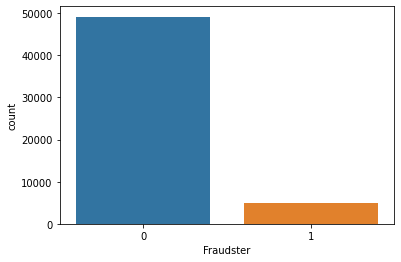

In [ ]:
countplot(train,'Fraudster')# there is an high imbalace in data there are also 90 percent od 0 and 10 percent of 1

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


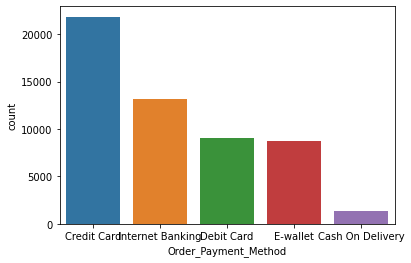

In [ ]:
countplot(train,'Order_Payment_Method')

In [ ]:
train.dtypes

Customer_ID                    int64
Order_ID                      object
Date_of_Order                 object
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
Merchant_ID                    int64
Fraudster                      int64
Ecommerce_Provider_ID          int64
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
dtype: object

In [ ]:
#function for the distplot
def dist_plot(data,cols):
  import seaborn as sns
  # used for numerical datatypes
  fig=sns.distplot(data[cols])
  #fig.show()



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


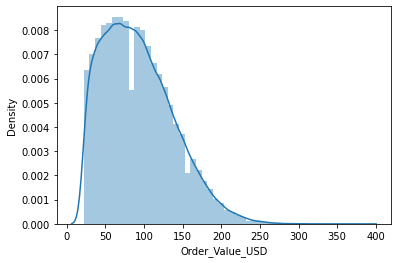

In [ ]:
dist_plot(train,'Order_Value_USD')# we can observe that its left skewed disribution

In [ ]:
# its find an ouliers and its drop those records
def remove_outliers(data,cols=None):
  import matplotlib.pyplot as plt
  %matplotlib inline
  fig=data.boxplot(cols)
  #fig.show()

  Q1=data[cols].quantile(0.25)
  Q3=data[cols].quantile(0.75)
  IQR = Q3-Q1
  lower_bound= Q1 - 1.5*IQR
  higher_bound= Q3 + 1.5*IQR
  print(lower_bound,higher_bound)


  outliers_points=data.index[(data[cols]<lower_bound) | (data[cols]> higher_bound)]
  print(outliers_points)

  ls= sorted(set(outliers_points))
  print(ls)


  data.drop(ls,axis=0,inplace=True)
  #fig2=plt.boxplot(cols)
  #fig2.show()


-45.5 222.5
Int64Index([   33,    46,    50,   614,   760,   925,  1281,  1299,  1552,
             1631,
            ...
            51982, 52041, 52152, 52172, 52451, 53324, 53591, 53720, 53779,
            54077],
           dtype='int64', length=373)
[33, 46, 50, 614, 760, 925, 1281, 1299, 1552, 1631, 1670, 1701, 2425, 2456, 2548, 2684, 2919, 2936, 2941, 3257, 3370, 3430, 3863, 4173, 4346, 4459, 4559, 4573, 4841, 4850, 4939, 4950, 4952, 5022, 5161, 5296, 5320, 5325, 5569, 5745, 5764, 6129, 6247, 6518, 6647, 6652, 6678, 6684, 6819, 6859, 7259, 7389, 7545, 8004, 8016, 8020, 8222, 8259, 8261, 8461, 8502, 8826, 8965, 8981, 9039, 9134, 9139, 9527, 9547, 9660, 9705, 9774, 10135, 10220, 10268, 10377, 10525, 10526, 10543, 10631, 10671, 10773, 10820, 10937, 10976, 11004, 11038, 11229, 11374, 11380, 11680, 12061, 12119, 12255, 12526, 12601, 12777, 12877, 12908, 13276, 13495, 13714, 13834, 13918, 14154, 14296, 15049, 15137, 15315, 15324, 15370, 15398, 15456, 15638, 15799, 15902, 16090, 16332,

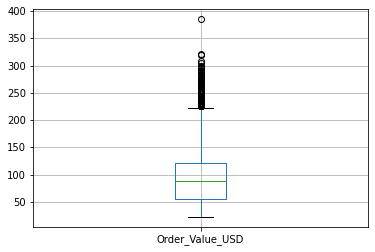

In [ ]:
remove_outliers(train,cols='Order_Value_USD')

9.0 57.0
Int64Index([  151,  1286,  1322,  1556,  1568,  1637,  1766,  1946,  1980,
             2200,
            ...
            52346, 52602, 52879, 52936, 53105, 53247, 53408, 53451, 53696,
            53934],
           dtype='int64', length=268)
[151, 1286, 1322, 1556, 1568, 1637, 1766, 1946, 1980, 2200, 2755, 2801, 2964, 3254, 4205, 4308, 4482, 4652, 4816, 4954, 5310, 5386, 5495, 5571, 5646, 5685, 5775, 5865, 6023, 6250, 6696, 6825, 6831, 7094, 7138, 7265, 7303, 7364, 7628, 7765, 7775, 7883, 7942, 8151, 8291, 8356, 8527, 8555, 8575, 8650, 8832, 8985, 9083, 9173, 9187, 9490, 10267, 10750, 10871, 11526, 11754, 11893, 11932, 11965, 12118, 12262, 12423, 12529, 12775, 12780, 13146, 13499, 13903, 14078, 14194, 14830, 15213, 15266, 15684, 16016, 16098, 16135, 16304, 16447, 16663, 16731, 16788, 17089, 17316, 17433, 17639, 17954, 18139, 18466, 18487, 18672, 18789, 19128, 19279, 19694, 20099, 20386, 20461, 20698, 20927, 21715, 21906, 21956, 22358, 22377, 22540, 23053, 23057, 23827, 24077,

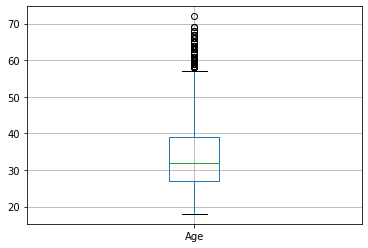

In [ ]:
remove_outliers(train,cols='Age')

9.0 57.0
Int64Index([  174,   559,  1267,  1841,  2102,  2471,  2682,  3036,  3189,
             3307,  3775,  4191,  4429,  4553,  4675,  4689,  4691,  4825,
             5236,  5262,  5335,  5411,  5537,  5574,  5584,  5632,  5810,
             5816,  5934,  5950,  6638,  6646,  6664,  6728,  6942,  7061,
             7658,  8060,  9047,  9064,  9436,  9459,  9463,  9792,  9818,
            10117, 10262, 10401, 10990, 11003, 11120, 11190, 11326, 11405,
            11430, 11591, 11654, 11687, 11695, 12037, 12213, 12765, 13094,
            13283, 13456],
           dtype='int64')
[174, 559, 1267, 1841, 2102, 2471, 2682, 3036, 3189, 3307, 3775, 4191, 4429, 4553, 4675, 4689, 4691, 4825, 5236, 5262, 5335, 5411, 5537, 5574, 5584, 5632, 5810, 5816, 5934, 5950, 6638, 6646, 6664, 6728, 6942, 7061, 7658, 8060, 9047, 9064, 9436, 9459, 9463, 9792, 9818, 10117, 10262, 10401, 10990, 11003, 11120, 11190, 11326, 11405, 11430, 11591, 11654, 11687, 11695, 12037, 12213, 12765, 13094, 13283, 13456]


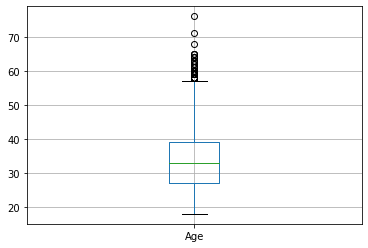

In [ ]:
remove_outliers(test,cols='Age')

-38.0 218.0
Int64Index([    8,    93,   155,   172,   188,   271,   279,   308,   398,
              411,
            ...
            12922, 12945, 12982, 12989, 13051, 13170, 13197, 13297, 13355,
            13405],
           dtype='int64', length=136)
[8, 93, 155, 172, 188, 271, 279, 308, 398, 411, 474, 487, 601, 798, 930, 1036, 1253, 1273, 1400, 1866, 1989, 2211, 2244, 2263, 2354, 2463, 2534, 2766, 2824, 2839, 2887, 2890, 3000, 3003, 3264, 3460, 3555, 3578, 3673, 3708, 3728, 3778, 3914, 4001, 4102, 4294, 4322, 4527, 4793, 5174, 5203, 5362, 5418, 5461, 5529, 5673, 6080, 6086, 6283, 6312, 6459, 6528, 6670, 6871, 7005, 7044, 7062, 7236, 7372, 7395, 7676, 7845, 7863, 7990, 8071, 8118, 8211, 8217, 8280, 8396, 8493, 8664, 8791, 8844, 8912, 9005, 9017, 9031, 9080, 9097, 9111, 9113, 9254, 9425, 9767, 9881, 10004, 10011, 10013, 10204, 10406, 10415, 10613, 10632, 10759, 10858, 10953, 11118, 11155, 11156, 11425, 11569, 11602, 11653, 11753, 11826, 11998, 12021, 12386, 12411, 12785, 12789, 1282

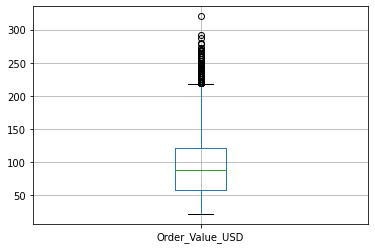

In [ ]:
remove_outliers(test,cols='Order_Value_USD')

In [ ]:
sns.boxplot(test['Order_Value_USD'],data=test)

NameError: ignored

In [ ]:
train.shape

(53572, 14)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


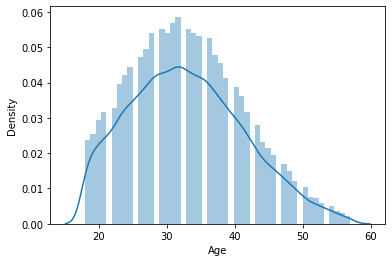

In [ ]:
dist_plot(train,'Age')# we can observe that its normal distribution

In [ ]:
def stripplot(data,cat_cols,num_cols):
  import seaborn as sns
  # used for one catgorical and one numerical
  sns.stripplot(data[cat_cols],data[num_cols])



In [ ]:
train.dtypes

Customer_ID                    int64
Order_ID                      object
Date_of_Order                 object
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
Merchant_ID                    int64
Fraudster                      int64
Ecommerce_Provider_ID          int64
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
dtype: object

In [ ]:
train

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,0,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,0,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,1,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,130.243.149.190
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,0,1746213,2018-08-17 01:52:14,ZPJCMOXVRXVJF,M,37,48.250.147.203
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,0,1746213,2018-05-26 11:58:33,NVDDVXILKZTVO,F,26,212.167.41.153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54208,143943,4b0857877884,2018-06-01 14:39:47,90,Ads,Credit Card,61951,0,1746213,2018-05-18 15:56:52,CBVSANBQRHOXH,F,21,85.11.23.249
54209,125429,2de2749f5442,2018-08-05 21:58:02,120,SEO,Debit Card,328145,0,1746213,2018-07-19 14:11:54,CAMZAFNRIHGNJ,F,24,139.57.167.53
54210,159393,11635fac40ff,2018-06-23 01:54:24,92,Ads,Credit Card,28307,0,1746213,2018-03-09 05:11:15,VYAOKZGMMJDYL,F,22,63.100.37.5
54211,133631,6bbcff2f14e5,2018-06-15 21:54:36,148,Ads,Cash On Delivery,277466,0,1746213,2018-04-19 11:40:47,NSKUWQPWMQMJB,M,28,205.61.122.177


In [ ]:
train['Order_Source'].unique()# to check unique 

array(['Direct', 'SEO', 'Ads'], dtype=object)

In [ ]:
train.describe()# to check the summary

,Customer_ID,Order_Value_USD,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Age
count,53572.000000,53572.000000,53572.000000,53572.000000,53572.0,53572.000000
mean,137974.025722,91.176137,200491.240816,0.092586,1746213.0,32.984600
std,15562.057485,44.022032,115385.861961,0.289854,0.0,8.428072
min,111234.000000,22.000000,2.000000,0.000000,1746213.0,18.000000
25%,124484.750000,55.000000,101050.000000,0.000000,1746213.0,27.000000
50%,137877.000000,85.000000,200741.000000,0.000000,1746213.0,32.000000
75%,151405.000000,120.000000,300506.750000,0.000000,1746213.0,39.000000
max,165000.000000,222.000000,399993.000000,1.000000,1746213.0,57.000000


In [ ]:
test

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,53637,1746213,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62
1,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,243517,1746213,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87
2,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,343640,1746213,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255
3,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,69889,1746213,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185
4,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,125706,1746213,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13549,153457,f0caea3c0bbb,2018-06-25 23:00:41,92,SEO,Credit Card,279884,1746213,2018-04-21 03:10:18,JNYAWEFRSBGCK,M,20,164.83.157.213
13550,139271,a23964a17f12,2018-07-14 19:20:44,128,SEO,Internet Banking,206253,1746213,2018-06-10 11:16:31,HYEKCYQYSPVIO,F,30,40.46.42.142
13551,156228,28e0b6aa4aca,2018-03-05 12:08:52,98,Direct,E-wallet,313049,1746213,2018-02-27 00:55:48,OVSRMAXBANHKT,F,44,210.44.212.84
13552,160078,3e1d365937d6,2018-05-22 18:30:43,68,SEO,Debit Card,304081,1746213,2018-05-20 12:17:43,STSCTKTROPBTH,F,39,46.244.39.59


In [ ]:
train

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,0,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,0,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,1,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,130.243.149.190
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,0,1746213,2018-08-17 01:52:14,ZPJCMOXVRXVJF,M,37,48.250.147.203
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,0,1746213,2018-05-26 11:58:33,NVDDVXILKZTVO,F,26,212.167.41.153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54208,143943,4b0857877884,2018-06-01 14:39:47,90,Ads,Credit Card,61951,0,1746213,2018-05-18 15:56:52,CBVSANBQRHOXH,F,21,85.11.23.249
54209,125429,2de2749f5442,2018-08-05 21:58:02,120,SEO,Debit Card,328145,0,1746213,2018-07-19 14:11:54,CAMZAFNRIHGNJ,F,24,139.57.167.53
54210,159393,11635fac40ff,2018-06-23 01:54:24,92,Ads,Credit Card,28307,0,1746213,2018-03-09 05:11:15,VYAOKZGMMJDYL,F,22,63.100.37.5
54211,133631,6bbcff2f14e5,2018-06-15 21:54:36,148,Ads,Cash On Delivery,277466,0,1746213,2018-04-19 11:40:47,NSKUWQPWMQMJB,M,28,205.61.122.177


In [ ]:
train['order_year']=train['Date_of_Order'].apply(lambda x:x.split("-")[0])
train['order_month']=train['Date_of_Order'].apply(lambda x:x.split("-")[1])
train['order_dat']=train['Date_of_Order'].apply(lambda x:x.split("-")[2])

In [ ]:
type(train['Order_Value_USD'])

pandas.core.series.Series

In [ ]:
train['order_dat'].str.split(' ').str[0].str.split(' ').str[0]


0        29
1        16
2        26
3        12
4        20
         ..
54208    01
54209    05
54210    23
54211    15
54212    17
Name: order_dat, Length: 53572, dtype: object

 the date and time columns and make a seperate column in train data 
2.for time columns we most need that in the minutes so we seperate that from columns and we multiple with 60

In [ ]:
test['order_year']=test['Date_of_Order'].apply(lambda x:x.split("-")[0])
test['order_month']=test['Date_of_Order'].apply(lambda x:x.split("-")[1])
test['order_dat']=test['Date_of_Order'].apply(lambda x:x.split("-")[2])
test['orderd_date']=test['order_dat'].str.split(' ').str[0].str.split(' ').str[0]
test['order_tieme']=test['order_dat'].str.split('/n').str[0].str.split(' ').str[1]

test['merch_joined_year']=test['Merchant_Registration_Date'].apply(lambda x:x.split("-")[0])
test['merch_joined_month']=test['Merchant_Registration_Date'].apply(lambda x:x.split("-")[1])
test['merch_joined_date']=test['Merchant_Registration_Date'].apply(lambda x:x.split("-")[2])
test['merch_joined_date']=test['merch_joined_date'].str.split(' ').str[0].str.split(' ').str[0]



In [ ]:
train['order_year']=train['Date_of_Order'].apply(lambda x:x.split("-")[0])
train['order_month']=train['Date_of_Order'].apply(lambda x:x.split("-")[1])
train['order_dat']=train['Date_of_Order'].apply(lambda x:x.split("-")[2])
train['orderd_date']=train['order_dat'].str.split(' ').str[0].str.split(' ').str[0]
train['order_tieme']=train['order_dat'].str.split('/n').str[0].str.split(' ').str[1]

train['merch_joined_year']=train['Merchant_Registration_Date'].apply(lambda x:x.split("-")[0])
train['merch_joined_month']=train['Merchant_Registration_Date'].apply(lambda x:x.split("-")[1])
train['merch_joined_date']=train['Merchant_Registration_Date'].apply(lambda x:x.split("-")[2])
train['merch_joined_date']=train['merch_joined_date'].str.split(' ').str[0].str.split(' ').str[0]



In [ ]:
train

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,...,Age,IP_Address,order_year,order_month,order_dat,orderd_date,order_tieme,merch_joined_year,merch_joined_month,merch_joined_date
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,0,1746213,2018-04-19 00:48:20,...,30,37.113.112.143,2018,04,29 16:39:26,29,16:39:26,2018,04,19
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,0,1746213,2018-05-15 23:30:37,...,20,190.255.172.133,2018,06,16 17:05:40,16,17:05:40,2018,05,15
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,1,1746213,2018-08-11 04:12:15,...,46,130.243.149.190,2018,10,26 18:00:46,26,18:00:46,2018,08,11
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,0,1746213,2018-08-17 01:52:14,...,37,48.250.147.203,2018,12,12 05:41:52,12,05:41:52,2018,08,17
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,0,1746213,2018-05-26 11:58:33,...,26,212.167.41.153,2018,09,20 11:06:10,20,11:06:10,2018,05,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54208,143943,4b0857877884,2018-06-01 14:39:47,90,Ads,Credit Card,61951,0,1746213,2018-05-18 15:56:52,...,21,85.11.23.249,2018,06,01 14:39:47,01,14:39:47,2018,05,18
54209,125429,2de2749f5442,2018-08-05 21:58:02,120,SEO,Debit Card,328145,0,1746213,2018-07-19 14:11:54,...,24,139.57.167.53,2018,08,05 21:58:02,05,21:58:02,2018,07,19
54210,159393,11635fac40ff,2018-06-23 01:54:24,92,Ads,Credit Card,28307,0,1746213,2018-03-09 05:11:15,...,22,63.100.37.5,2018,06,23 01:54:24,23,01:54:24,2018,03,09
54211,133631,6bbcff2f14e5,2018-06-15 21:54:36,148,Ads,Cash On Delivery,277466,0,1746213,2018-04-19 11:40:47,...,28,205.61.122.177,2018,06,15 21:54:36,15,21:54:36,2018,04,19


In [ ]:
test.shape

(13353, 21)

In [ ]:
train

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,...,Age,IP_Address,order_year,order_month,order_dat,orderd_date,order_tieme,merch_joined_year,merch_joined_month,merch_joined_date
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,0,1746213,2018-04-19 00:48:20,...,30,37.113.112.143,2018,04,29 16:39:26,29,16:39:26,2018,04,19
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,0,1746213,2018-05-15 23:30:37,...,20,190.255.172.133,2018,06,16 17:05:40,16,17:05:40,2018,05,15
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,1,1746213,2018-08-11 04:12:15,...,46,130.243.149.190,2018,10,26 18:00:46,26,18:00:46,2018,08,11
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,0,1746213,2018-08-17 01:52:14,...,37,48.250.147.203,2018,12,12 05:41:52,12,05:41:52,2018,08,17
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,0,1746213,2018-05-26 11:58:33,...,26,212.167.41.153,2018,09,20 11:06:10,20,11:06:10,2018,05,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54208,143943,4b0857877884,2018-06-01 14:39:47,90,Ads,Credit Card,61951,0,1746213,2018-05-18 15:56:52,...,21,85.11.23.249,2018,06,01 14:39:47,01,14:39:47,2018,05,18
54209,125429,2de2749f5442,2018-08-05 21:58:02,120,SEO,Debit Card,328145,0,1746213,2018-07-19 14:11:54,...,24,139.57.167.53,2018,08,05 21:58:02,05,21:58:02,2018,07,19
54210,159393,11635fac40ff,2018-06-23 01:54:24,92,Ads,Credit Card,28307,0,1746213,2018-03-09 05:11:15,...,22,63.100.37.5,2018,06,23 01:54:24,23,01:54:24,2018,03,09
54211,133631,6bbcff2f14e5,2018-06-15 21:54:36,148,Ads,Cash On Delivery,277466,0,1746213,2018-04-19 11:40:47,...,28,205.61.122.177,2018,06,15 21:54:36,15,21:54:36,2018,04,19


In [ ]:
train['Registered_Device_ID'].value_counts()

TCFHYPEGJMBIZ    9
AZPFJFPBMDWHC    9
VGGTRBYDZMCPN    9
RDLIARTBSYNJX    9
KJEKRMHEHLUOR    9
                ..
QTHEACZSWCEYG    1
QNDKMZRUEPQCJ    1
FKLQEQOZEYOPV    1
MUQNCXAZVRWUX    1
XZBPDCLKSTVPP    1
Name: Registered_Device_ID, Length: 50694, dtype: int64

In [ ]:
train.columns

Index(['Customer_ID', 'Order_ID', 'Date_of_Order', 'Order_Value_USD',
       'Order_Source', 'Order_Payment_Method', 'Merchant_ID', 'Fraudster',
       'Ecommerce_Provider_ID', 'Merchant_Registration_Date',
       'Registered_Device_ID', 'Gender', 'Age', 'IP_Address', 'order_year',
       'order_month', 'order_dat', 'orderd_date', 'order_tieme',
       'merch_joined_year', 'merch_joined_month', 'merch_joined_date'],
      dtype='object')

In [ ]:
#drop unwanted columns in train data
train.drop(['Customer_ID', 'Order_ID', 'Date_of_Order','order_dat','order_tieme','Merchant_ID','Merchant_Registration_Date','Registered_Device_ID'],axis=1,inplace=True)

In [ ]:
#drop unwanted columns in train data
test.drop(['Customer_ID', 'Order_ID', 'Date_of_Order','order_dat','order_tieme','Merchant_ID','Merchant_Registration_Date','Registered_Device_ID'],axis=1,inplace=True)

In [ ]:
train

,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,Ecommerce_Provider_ID,Gender,Age,IP_Address,order_year,order_month,orderd_date,merch_joined_year,merch_joined_month,merch_joined_date
0,148,Direct,Credit Card,0,1746213,M,30,37.113.112.143,2018,04,29,2018,04,19
1,145,SEO,Credit Card,0,1746213,F,20,190.255.172.133,2018,06,16,2018,05,15
2,62,Ads,Internet Banking,1,1746213,F,46,130.243.149.190,2018,10,26,2018,08,11
3,28,SEO,Debit Card,0,1746213,M,37,48.250.147.203,2018,12,12,2018,08,17
4,70,Ads,Credit Card,0,1746213,F,26,212.167.41.153,2018,09,20,2018,05,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54208,90,Ads,Credit Card,0,1746213,F,21,85.11.23.249,2018,06,01,2018,05,18
54209,120,SEO,Debit Card,0,1746213,F,24,139.57.167.53,2018,08,05,2018,07,19
54210,92,Ads,Credit Card,0,1746213,F,22,63.100.37.5,2018,06,23,2018,03,09
54211,148,Ads,Cash On Delivery,0,1746213,M,28,205.61.122.177,2018,06,15,2018,04,19


In [ ]:
train.shape

(53572, 14)

In [ ]:
test.shape

(13353, 13)

In [ ]:
train.head(5)

,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,Ecommerce_Provider_ID,Gender,Age,IP_Address,order_year,order_month,orderd_date,merch_joined_year,merch_joined_month,merch_joined_date
0,148,Direct,Credit Card,0,1746213,M,30,37.113.112.143,2018,04,29,2018,04,19
1,145,SEO,Credit Card,0,1746213,F,20,190.255.172.133,2018,06,16,2018,05,15
2,62,Ads,Internet Banking,1,1746213,F,46,130.243.149.190,2018,10,26,2018,08,11
3,28,SEO,Debit Card,0,1746213,M,37,48.250.147.203,2018,12,12,2018,08,17
4,70,Ads,Credit Card,0,1746213,F,26,212.167.41.153,2018,09,20,2018,05,26


In [ ]:
train.columns

Index(['Order_Value_USD', 'Order_Source', 'Order_Payment_Method', 'Fraudster',
       'Ecommerce_Provider_ID', 'Gender', 'Age', 'IP_Address', 'order_year',
       'order_month', 'orderd_date', 'merch_joined_year', 'merch_joined_month',
       'merch_joined_date'],
      dtype='object')

In [ ]:
train.shape

(53572, 14)

In [ ]:
train['Fraudster'].value_counts()# number of yes and no | here we can observe that its clear case of data imbalnce

0    48612
1     4960
Name: Fraudster, dtype: int64

In [ ]:
train.dtypes# check data types

Order_Value_USD           int64
Order_Source             object
Order_Payment_Method     object
Fraudster                 int64
Ecommerce_Provider_ID     int64
Gender                   object
Age                       int64
IP_Address               object
order_year               object
order_month              object
orderd_date              object
merch_joined_year        object
merch_joined_month       object
merch_joined_date        object
dtype: object

In [ ]:
train.columns

Index(['Order_Value_USD', 'Order_Source', 'Order_Payment_Method', 'Fraudster',
       'Ecommerce_Provider_ID', 'Gender', 'Age', 'IP_Address', 'order_year',
       'order_month', 'orderd_date', 'merch_joined_year', 'merch_joined_month',
       'merch_joined_date'],
      dtype='object')

In [ ]:
#cols=[ 'order_year', 'order_month',
    #   'orderd_date', 'merch_joined_year', 'merch_joined_month',
     #  'merch_joined_date', 'order_time_duriation_min']

In [ ]:


#train[cols]=train[cols].astype('int')# change data type from object to int in train data

In [ ]:


#test[cols]=test[cols].astype('int')# change data type from object to int in test data

In [ ]:
test.dtypes

Order_Value_USD           int64
Order_Source             object
Order_Payment_Method     object
Ecommerce_Provider_ID     int64
Gender                   object
Age                       int64
IP_Address               object
order_year               object
order_month              object
orderd_date              object
merch_joined_year        object
merch_joined_month       object
merch_joined_date        object
dtype: object

In [ ]:
train.dtypes

Order_Value_USD           int64
Order_Source             object
Order_Payment_Method     object
Fraudster                 int64
Ecommerce_Provider_ID     int64
Gender                   object
Age                       int64
IP_Address               object
order_year               object
order_month              object
orderd_date              object
merch_joined_year        object
merch_joined_month       object
merch_joined_date        object
dtype: object

In [ ]:
train.shape

(53572, 14)

In [ ]:
train.drop(['IP_Address','Ecommerce_Provider_ID'],axis=1,inplace=True)# drop ip_address in test data

In [ ]:
test.drop(['IP_Address','Ecommerce_Provider_ID'],axis=1,inplace=True)# drop ip_address in test data

In [ ]:
def convert_columns_types(DataFrame, cols=None, col_type = 'category'):
    print('Before conversion:\n', DataFrame.dtypes,'\n')
    DataFrame[cols] = DataFrame[cols].astype(col_type)
    print('After conversion:\n', DataFrame.dtypes,'\n')
    return DataFrame

In [ ]:
test.shape

(13353, 11)

In [ ]:
train.shape

(53572, 12)

In [ ]:
chnage=train.select_dtypes(include=['object']).columns
train[chnage]=train[chnage].astype('category')

In [ ]:
train.dtypes

Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
Fraudster                  int64
Gender                  category
Age                        int64
order_year              category
order_month             category
orderd_date             category
merch_joined_year       category
merch_joined_month      category
merch_joined_date       category
dtype: object

In [ ]:
chnage1=test.select_dtypes(include=['object']).columns
test[chnage1]=test[chnage1].astype('category')

In [ ]:
test.dtypes

Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
Gender                  category
Age                        int64
order_year              category
order_month             category
orderd_date             category
merch_joined_year       category
merch_joined_month      category
merch_joined_date       category
dtype: object

In [ ]:
train.dtypes

Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
Fraudster                  int64
Gender                  category
Age                        int64
order_year              category
order_month             category
orderd_date             category
merch_joined_year       category
merch_joined_month      category
merch_joined_date       category
dtype: object

In [ ]:
test.dtypes

Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
Gender                  category
Age                        int64
order_year              category
order_month             category
orderd_date             category
merch_joined_year       category
merch_joined_month      category
merch_joined_date       category
dtype: object

In [ ]:
train['Fraudster']=train['Fraudster'].astype('category')# changing target variable in categorical 

In [ ]:
train

,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,Gender,Age,order_year,order_month,orderd_date,merch_joined_year,merch_joined_month,merch_joined_date
0,148,Direct,Credit Card,0,M,30,2018,04,29,2018,04,19
1,145,SEO,Credit Card,0,F,20,2018,06,16,2018,05,15
2,62,Ads,Internet Banking,1,F,46,2018,10,26,2018,08,11
3,28,SEO,Debit Card,0,M,37,2018,12,12,2018,08,17
4,70,Ads,Credit Card,0,F,26,2018,09,20,2018,05,26
...,...,...,...,...,...,...,...,...,...,...,...,...
54208,90,Ads,Credit Card,0,F,21,2018,06,01,2018,05,18
54209,120,SEO,Debit Card,0,F,24,2018,08,05,2018,07,19
54210,92,Ads,Credit Card,0,F,22,2018,06,23,2018,03,09
54211,148,Ads,Cash On Delivery,0,M,28,2018,06,15,2018,04,19


by observing the heat map(correlation) we see that there is an collinerity bettween merchan joined month and order month soo wee need to drop that

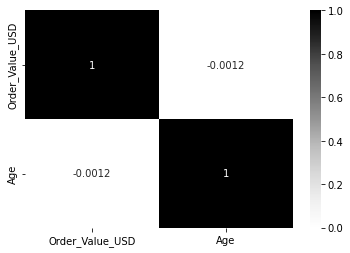

In [ ]:
import seaborn as sns
sns.heatmap(train.corr(),annot=True,cmap='Greys')

In [ ]:
#train.drop(['merch_joined_month'],axis=1,inplace=True)# droping columns that causing collinerity in train data

In [ ]:
test

,Order_Value_USD,Order_Source,Order_Payment_Method,Gender,Age,order_year,order_month,orderd_date,merch_joined_year,merch_joined_month,merch_joined_date
0,60,SEO,Credit Card,F,40,2018,03,09,2018,02,11
1,28,SEO,Credit Card,M,39,2018,06,13,2018,04,06
2,75,Ads,Debit Card,M,23,2018,04,14,2018,01,12
3,98,SEO,Credit Card,M,34,2018,04,01,2018,02,19
4,35,SEO,Credit Card,M,20,2018,05,25,2018,05,17
...,...,...,...,...,...,...,...,...,...,...,...
13549,92,SEO,Credit Card,M,20,2018,06,25,2018,04,21
13550,128,SEO,Internet Banking,F,30,2018,07,14,2018,06,10
13551,98,Direct,E-wallet,F,44,2018,03,05,2018,02,27
13552,68,SEO,Debit Card,F,39,2018,05,22,2018,05,20


In [ ]:
print(train.shape)
print(test.shape)

(53572, 12)
(13353, 11)


In [ ]:
train.columns

Index(['Order_Value_USD', 'Order_Source', 'Order_Payment_Method', 'Fraudster',
       'Gender', 'Age', 'order_year', 'order_month', 'orderd_date',
       'merch_joined_year', 'merch_joined_month', 'merch_joined_date'],
      dtype='object')

In [ ]:
test.columns

Index(['Order_Value_USD', 'Order_Source', 'Order_Payment_Method', 'Gender',
       'Age', 'order_year', 'order_month', 'orderd_date', 'merch_joined_year',
       'merch_joined_month', 'merch_joined_date'],
      dtype='object')

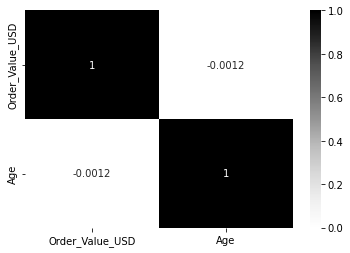

In [ ]:

sns.heatmap(train.corr(),annot=True,cmap='Greys')# now there is no collinerity

In [ ]:
x=train.drop(['Fraudster'],axis=1)
y=train['Fraudster']# making x,y dataframes where the preprocessing is done to the x columns

In [ ]:
x.columns

Index(['Order_Value_USD', 'Order_Source', 'Order_Payment_Method', 'Gender',
       'Age', 'order_year', 'order_month', 'orderd_date', 'merch_joined_year',
       'merch_joined_month', 'merch_joined_date'],
      dtype='object')

In [ ]:
x

,Order_Value_USD,Order_Source,Order_Payment_Method,Gender,Age,order_year,order_month,orderd_date,merch_joined_year,merch_joined_month,merch_joined_date
0,148,Direct,Credit Card,M,30,2018,04,29,2018,04,19
1,145,SEO,Credit Card,F,20,2018,06,16,2018,05,15
2,62,Ads,Internet Banking,F,46,2018,10,26,2018,08,11
3,28,SEO,Debit Card,M,37,2018,12,12,2018,08,17
4,70,Ads,Credit Card,F,26,2018,09,20,2018,05,26
...,...,...,...,...,...,...,...,...,...,...,...
54208,90,Ads,Credit Card,F,21,2018,06,01,2018,05,18
54209,120,SEO,Debit Card,F,24,2018,08,05,2018,07,19
54210,92,Ads,Credit Card,F,22,2018,06,23,2018,03,09
54211,148,Ads,Cash On Delivery,M,28,2018,06,15,2018,04,19


In [ ]:

from pandas.core.arrays.interval import value_counts
train['Fraudster'].value_counts()# there is an data imbalnce

0    48612
1     4960
Name: Fraudster, dtype: int64

In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=123)# splitting file into x_train,x_test,y_train

In [ ]:
y.value_counts()

0    48612
1     4960
Name: Fraudster, dtype: int64

In [ ]:
x_train.dtypes

Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
Gender                  category
Age                        int64
order_year              category
order_month             category
orderd_date             category
merch_joined_year       category
merch_joined_month      category
merch_joined_date       category
dtype: object

In [ ]:
x_train

,Order_Value_USD,Order_Source,Order_Payment_Method,Gender,Age,order_year,order_month,orderd_date,merch_joined_year,merch_joined_month,merch_joined_date
49071,80,Direct,Credit Card,F,37,2018,07,27,2018,05,09
22577,45,SEO,Credit Card,M,23,2018,07,21,2018,04,18
48837,62,SEO,Internet Banking,M,19,2018,05,31,2018,03,20
53485,85,Ads,Credit Card,M,27,2018,06,29,2018,06,19
20199,88,SEO,Internet Banking,M,34,2018,06,22,2018,03,13
...,...,...,...,...,...,...,...,...,...,...,...
15568,70,SEO,Internet Banking,F,42,2018,06,18,2018,05,28
17950,48,SEO,Credit Card,M,35,2018,03,29,2018,02,28
28382,32,SEO,Debit Card,F,52,2018,01,21,2018,01,04
15920,28,SEO,Debit Card,M,41,2018,10,07,2018,08,10


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
re_x_train, re_y_train= smote.fit_resample(x_train, y_train)
#re_x_train, re_y_train= smote.fit_resample(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


ValueError: ignored

we need to make the imbalance data to balance data by choosing different methos \ here i used undersmpling


In [ ]:
#no=train[train['Fraudster']==1]#seperating the records which having Fraudster =1
no

,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,Gender,Age,order_year,order_month,orderd_date,merch_joined_year,merch_joined_month,merch_joined_date
2,62,Ads,Internet Banking,1,F,46,2018,10,26,2018,08,11
9,45,Direct,Credit Card,1,M,38,2018,01,06,2018,01,04
13,148,SEO,Cash On Delivery,1,F,31,2018,06,30,2018,04,07
24,108,Ads,Credit Card,1,M,30,2018,01,08,2018,01,06
30,160,Direct,E-wallet,1,F,36,2018,09,17,2018,06,04
...,...,...,...,...,...,...,...,...,...,...,...,...
54155,128,Ads,Credit Card,1,M,29,2018,01,03,2018,01,01
54167,32,Direct,Credit Card,1,F,24,2018,07,16,2018,05,03
54170,120,Ads,Debit Card,1,F,33,2018,01,12,2018,01,10
54184,112,Direct,Credit Card,1,M,41,2018,07,31,2018,04,22


In [ ]:
#yes=train[train['Fraudster']==0]#seperating the records which having Fraudster =0
#yes=yes.sample(n = 4960)# ramdomly selecting the 5025 records which are 0
yes

,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,Gender,Age,order_year,order_month,orderd_date,merch_joined_year,merch_joined_month,merch_joined_date
7367,148,SEO,Credit Card,0,F,42,2018,02,18,2018,01,09
46144,165,Direct,Internet Banking,0,M,26,2018,07,09,2018,04,16
17104,42,Direct,E-wallet,0,F,28,2018,04,14,2018,01,15
49638,62,SEO,Internet Banking,0,M,22,2018,05,22,2018,04,24
11018,132,SEO,Internet Banking,0,M,44,2018,07,01,2018,04,19
...,...,...,...,...,...,...,...,...,...,...,...,...
31168,48,SEO,E-wallet,0,F,28,2018,07,13,2018,05,19
19329,25,SEO,Credit Card,0,M,34,2018,06,01,2018,01,30
1457,32,Ads,Debit Card,0,M,31,2018,06,30,2018,03,21
42413,110,Direct,E-wallet,0,F,37,2018,10,09,2018,08,06


In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
ENN=EditedNearestNeighbours()

In [ ]:
x_res,y_res=ENN.fit_resample(x_train,y_train)

In [ ]:
rfc7=RandomForestClassifier(n_estimators=49,max_depth=10,criterion='entropy')
get_predictions(rfc7,x_res,x_test,y_res,y_test)


[[28779    43]
 [ 1652  1852]]
0.9475654272102951
0.5285388127853882
0.9773087071240105
0.6860529727727357
[[14418   198]
 [  671   785]]
0.9459308113489299
0.5391483516483516
0.7985757884028484
0.6437064370643706


In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
SM=SMOTEENN()
x_sm,y_sm=SM.fit_resample(x_train,y_train)

In [ ]:
rfc7=RandomForestClassifier(n_estimators=49,max_depth=10,criterion='entropy')
get_predictions(rfc7,x_sm,x_test,y_sm,y_test)


[[18872    53]
 [ 3864 30110]]
0.9259532316300875
0.8862659680932478
0.9982428803500978
0.9389276080889346
[[14331   285]
 [  669   787]]
0.9406421105027377
0.540521978021978
0.7341417910447762
0.622626582278481


In [ ]:
rfc7=RandomForestClassifier(n_estimators=49,max_depth=10,criterion='entropy')
get_predictions(rfc7,re_x_train,x_test,re_y_train,y_test)

#re_x_train, re_y_train= smote.fit_resample(x_train, y_train)

[[33519   477]
 [10576 23420]]
0.8374367572655607
0.6889045770090599
0.9800393354814412
0.8090788178190802
[[14386   230]
 [  670   786]]
0.9440019910403186
0.5398351648351648
0.7736220472440944
0.6359223300970874


In [ ]:
#yes.reset_index(inplace = True, drop = True)
#no.reset_index(inplace = True, drop = True)# reseting index  to merge or concat the yes and no


In [ ]:
#result = pd.concat([yes,no],axis=0,join='inner')# concat the data as per rows


In [ ]:
#result

,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,Gender,Age,order_year,order_month,orderd_date,merch_joined_year,merch_joined_month,merch_joined_date
0,148,SEO,Credit Card,0,F,42,2018,02,18,2018,01,09
1,165,Direct,Internet Banking,0,M,26,2018,07,09,2018,04,16
2,42,Direct,E-wallet,0,F,28,2018,04,14,2018,01,15
3,62,SEO,Internet Banking,0,M,22,2018,05,22,2018,04,24
4,132,SEO,Internet Banking,0,M,44,2018,07,01,2018,04,19
...,...,...,...,...,...,...,...,...,...,...,...,...
4955,128,Ads,Credit Card,1,M,29,2018,01,03,2018,01,01
4956,32,Direct,Credit Card,1,F,24,2018,07,16,2018,05,03
4957,120,Ads,Debit Card,1,F,33,2018,01,12,2018,01,10
4958,112,Direct,Credit Card,1,M,41,2018,07,31,2018,04,22


In [ ]:
result.isna().sum(axis=0)# check null values if haviing null means merge no correctly happend

Order_Value_USD         0
Order_Source            0
Order_Payment_Method    0
Fraudster               0
Gender                  0
Age                     0
order_year              0
order_month             0
orderd_date             0
merch_joined_year       0
merch_joined_month      0
merch_joined_date       0
dtype: int64

In [ ]:
train=result.copy()

In [ ]:
train.columns

Index(['Order_Value_USD', 'Order_Source', 'Order_Payment_Method', 'Fraudster',
       'Gender', 'Age', 'order_year', 'order_month', 'orderd_date',
       'merch_joined_year', 'merch_joined_month', 'merch_joined_date'],
      dtype='object')

In [ ]:
train.dtypes

Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
Fraudster               category
Gender                  category
Age                        int64
order_year              category
order_month             category
orderd_date             category
merch_joined_year       category
merch_joined_month      category
merch_joined_date       category
dtype: object

In [ ]:
x=train.drop('Fraudster',axis=1)
y=train['Fraudster']# seperate x and y dataframes

In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=123)

In [ ]:
x_train.dtypes

Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
Gender                  category
Age                        int64
order_year              category
order_month             category
orderd_date             category
merch_joined_year       category
merch_joined_month      category
merch_joined_date       category
dtype: object

In [ ]:
# standarize the numerical values

from sklearn.preprocessing import StandardScaler
num_attr = x_train.select_dtypes(['int','float']).columns
    

scaler = StandardScaler()
scaler.fit(x_train[num_attr])
x_train[num_attr]=scaler.transform(x_train[num_attr])
x_test[num_attr]=scaler.transform(x_test[num_attr])
test[num_attr]=scaler.transform(test[num_attr])




In [ ]:
test

,Order_Value_USD,Order_Source,Order_Payment_Method,Gender,Age,order_year,order_month,orderd_date,merch_joined_year,merch_joined_month,merch_joined_date
0,-0.709887,SEO,Credit Card,F,0.833870,2018,03,09,2018,02,11
1,-1.435709,SEO,Credit Card,M,0.715306,2018,06,13,2018,04,06
2,-0.369657,Ads,Debit Card,M,-1.181721,2018,04,14,2018,01,12
3,0.152028,SEO,Credit Card,M,0.122485,2018,04,01,2018,02,19
4,-1.276936,SEO,Credit Card,M,-1.537414,2018,05,25,2018,05,17
...,...,...,...,...,...,...,...,...,...,...,...
13549,0.015936,SEO,Credit Card,M,-1.537414,2018,06,25,2018,04,21
13550,0.832487,SEO,Internet Banking,F,-0.351772,2018,07,14,2018,06,10
13551,0.152028,Direct,E-wallet,F,1.308127,2018,03,05,2018,02,27
13552,-0.528431,SEO,Debit Card,F,0.715306,2018,05,22,2018,05,20


In [ ]:
cat_cols=x_train.select_dtypes(include=['category'])

In [ ]:
# seperate the num colmns from  data and reset index
train_num=x_train.select_dtypes(include=['int','float64'])
x_test_num=x_test.select_dtypes(include=['int','float'])
test_num=test.select_dtypes(include=['int','float'])
train_num.reset_index(inplace = True, drop = True)
x_test_num.reset_index(inplace = True, drop = True)
test_num.reset_index(inplace = True, drop = True)


In [ ]:
# doing onehot encoding for cate
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False) 
x_train = ohe.fit_transform(x_train[cat_cols.columns])
x_train=pd.DataFrame(x_train)
x_train.columns=ohe.get_feature_names()

x_test = ohe.fit_transform(x_test[cat_cols.columns])
x_test=pd.DataFrame(x_test)
x_test.columns=ohe.get_feature_names()
x_test


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_Ads,x0_Direct,x0_SEO,x1_Cash On Delivery,x1_Credit Card,x1_Debit Card,x1_E-wallet,x1_Internet Banking,x2_F,x2_M,...,x8_22,x8_23,x8_24,x8_25,x8_26,x8_27,x8_28,x8_29,x8_30,x8_31
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16067,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16068,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16069,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16070,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test = ohe.fit_transform(test[cat_cols.columns])
test=pd.DataFrame(test)
test.columns=ohe.get_feature_names()
test

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_Ads,x0_Direct,x0_SEO,x1_Cash On Delivery,x1_Credit Card,x1_Debit Card,x1_E-wallet,x1_Internet Banking,x2_F,x2_M,...,x8_22,x8_23,x8_24,x8_25,x8_26,x8_27,x8_28,x8_29,x8_30,x8_31
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13348,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13349,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13350,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13351,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_test_num

,Order_Value_USD,Age
0,-0.074792,2.493769
1,-1.344981,0.359613
2,-0.301611,-1.300286
3,0.877850,-0.114644
4,0.015936,-0.351772
...,...,...
16067,-1.503755,0.122485
16068,0.424211,-0.826029
16069,-0.256247,0.715306
16070,2.193404,-0.944593


In [ ]:
x_test = pd.concat([x_test,x_test_num],axis='columns')
x_test

,x0_Ads,x0_Direct,x0_SEO,x1_Cash On Delivery,x1_Credit Card,x1_Debit Card,x1_E-wallet,x1_Internet Banking,x2_F,x2_M,...,x8_24,x8_25,x8_26,x8_27,x8_28,x8_29,x8_30,x8_31,Order_Value_USD,Age
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.074792,2.493769
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.344981,0.359613
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.301611,-1.300286
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.877850,-0.114644
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015936,-0.351772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16067,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.503755,0.122485
16068,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.424211,-0.826029
16069,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.256247,0.715306
16070,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.193404,-0.944593


In [ ]:
x_train = pd.concat([x_train,train_num],axis='columns')
x_train

,x0_Ads,x0_Direct,x0_SEO,x1_Cash On Delivery,x1_Credit Card,x1_Debit Card,x1_E-wallet,x1_Internet Banking,x2_F,x2_M,...,x8_24,x8_25,x8_26,x8_27,x8_28,x8_29,x8_30,x8_31,Order_Value_USD,Age
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.256247,0.478177
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.050116,-1.181721
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.664523,-1.655978
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.142838,-0.707465
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.074792,0.122485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.483067,1.070998
37496,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.982070,0.241049
37497,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.344981,2.256640
37498,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.435709,0.952434


In [ ]:
test = pd.concat([test,test_num],axis='columns')
test

,x0_Ads,x0_Direct,x0_SEO,x1_Cash On Delivery,x1_Credit Card,x1_Debit Card,x1_E-wallet,x1_Internet Banking,x2_F,x2_M,...,x8_24,x8_25,x8_26,x8_27,x8_28,x8_29,x8_30,x8_31,Order_Value_USD,Age
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.709887,0.833870
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.435709,0.715306
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.369657,-1.181721
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.152028,0.122485
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.276936,-1.537414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13348,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015936,-1.537414
13349,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.832487,-0.351772
13350,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.152028,1.308127
13351,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.528431,0.715306


In [ ]:
test

,x0_Ads,x0_Direct,x0_SEO,x1_Cash On Delivery,x1_Credit Card,x1_Debit Card,x1_E-wallet,x1_Internet Banking,x2_F,x2_M,...,x8_24,x8_25,x8_26,x8_27,x8_28,x8_29,x8_30,x8_31,Order_Value_USD,Age
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.709887,0.833870
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.435709,0.715306
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.369657,-1.181721
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.152028,0.122485
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.276936,-1.537414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13348,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015936,-1.537414
13349,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.832487,-0.351772
13350,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.152028,1.308127
13351,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.528431,0.715306


In [ ]:
x_train

,x0_Ads,x0_Direct,x0_SEO,x1_Cash On Delivery,x1_Credit Card,x1_Debit Card,x1_E-wallet,x1_Internet Banking,x2_F,x2_M,...,x8_24,x8_25,x8_26,x8_27,x8_28,x8_29,x8_30,x8_31,Order_Value_USD,Age
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.256247,0.478177
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.050116,-1.181721
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.664523,-1.655978
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.142838,-0.707465
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.074792,0.122485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.483067,1.070998
37496,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.982070,0.241049
37497,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.344981,2.256640
37498,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.435709,0.952434


In [ ]:
#x_test=pd.get_dummies(columns=cat_cols,data=x_test,prefix=cat_cols,prefix_sep='_',drop_first=True)

In [ ]:
x_test

,x0_Ads,x0_Direct,x0_SEO,x1_Cash On Delivery,x1_Credit Card,x1_Debit Card,x1_E-wallet,x1_Internet Banking,x2_F,x2_M,...,x8_24,x8_25,x8_26,x8_27,x8_28,x8_29,x8_30,x8_31,Order_Value_USD,Age
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.074792,2.493769
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.344981,0.359613
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.301611,-1.300286
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.877850,-0.114644
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015936,-0.351772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16067,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.503755,0.122485
16068,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.424211,-0.826029
16069,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.256247,0.715306
16070,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.193404,-0.944593


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
re_x_train, re_y_train= smote.fit_resample(x_train, y_train)
#re_x_train, re_y_train= smote.fit_resample(x_train, y_train)

In [ ]:
print(re_x_train.shape)
print(x_train.shape)

(67992, 96)
(37500, 96)


In [ ]:
print(pd.value_counts(re_y_train,normalize=True)*100)
print(pd.value_counts(y_train, normalize=True)*100)

0    50.0
1    50.0
Name: Fraudster, dtype: float64
0    90.656
1     9.344
Name: Fraudster, dtype: float64


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score

def score_model(model,x_train,x_test,y_train,y_test):
  model=model.fit(x_train,y_train)
  train_preds=model.predict(x_train)
  test_preds=model.predict(x_test)


  print(confusion_matrix(y_train,train_preds))
  print(accuracy_score(y_train,train_preds))
  print(recall_score(y_train,train_preds))
  print(precision_score(y_train,train_preds))
  print(f1_score(y_train,train_preds))

  print(confusion_matrix(y_test,test_preds))
  print(accuracy_score(y_test,test_preds))
  print(recall_score(y_test,test_preds))
  print(precision_score(y_test,test_preds))
  print(f1_score(y_test,test_preds))



  from sklearn.metrics import roc_curve, auc

  fpr, tpr, threshold = roc_curve(y_train, train_preds)
  roc_auc = auc(fpr, tpr)
  %matplotlib inline
  plt.figure()
  plt.plot([0,1],[0,1],color='navy', lw=2, linestyle='--')
  plt.plot(fpr,tpr,color='orange', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)

  plt.xlabel('FPR')
  plt.ylabel('TPR')

  plt.legend(loc="lower right")






In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score

def score_model(model,x_train,x_test,y_train,y_test):
  model=model.fit(x_train,y_train)
  train_preds=model.predict(x_train)
  test_preds=model.predict(x_test)


  print(confusion_matrix(y_train,train_preds))
  print(accuracy_score(y_train,train_preds))
  print(recall_score(y_train,train_preds))
  print(precision_score(y_train,train_preds))
  print(f1_score(y_train,train_preds))

  print(confusion_matrix(y_test,test_preds))
  print(accuracy_score(y_test,test_preds))
  print(recall_score(y_test,test_preds))
  print(precision_score(y_test,test_preds))
  print(f1_score(y_test,test_preds))



  from sklearn.metrics import roc_curve, auc

  fpr, tpr, threshold = roc_curve(y_train, train_preds)
  roc_auc = auc(fpr, tpr)
  %matplotlib inline
  plt.figure()
  plt.plot([0,1],[0,1],color='navy', lw=2, linestyle='--')
  plt.plot(fpr,tpr,color='orange', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)

  plt.xlabel('FPR')
  plt.ylabel('TPR')

  plt.legend(loc="lower right")




from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score

def get_predictions(model,x_train,x_test,y_train,y_test):
  model=model.fit(x_train,y_train)
  train_preds=model.predict(x_train)
  test_preds=model.predict(x_test)


  print(confusion_matrix(y_train,train_preds))
  print(accuracy_score(y_train,train_preds))
  print(recall_score(y_train,train_preds))
  print(precision_score(y_train,train_preds))
  print(f1_score(y_train,train_preds))

  print(confusion_matrix(y_test,test_preds))
  print(accuracy_score(y_test,test_preds))
  print(recall_score(y_test,test_preds))
  print(precision_score(y_test,test_preds))
  print(f1_score(y_test,test_preds))










In [ ]:
print(x_train.shape)
print(x_test.shape)

(37500, 96)
(16072, 96)


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=12)

In [ ]:
pdca=pd.DataFrame(data=pca.fit_transform(x_train))

pdca_test=pd.DataFrame(data=pca.transform(x_test))

In [ ]:
score_model(xgb1,pdca,pdca_test,y_train,y_test)

[[3417   43]
 [1546 1938]]
0.7711693548387096
0.5562571756601608
0.9782937910146391
0.7092406221408966
[[1468   32]
 [ 726  750]]
0.7452956989247311
0.508130081300813
0.959079283887468
0.6643046944198406


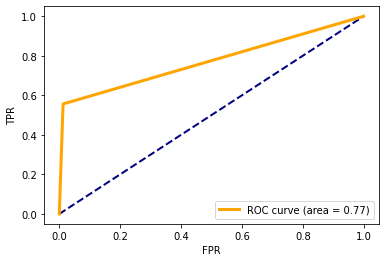

In [ ]:
score_model(xgb1,pdca,pdca_test,y_train,y_test)

[[3411   49]
 [1562 1922]]
0.7680011520737328
0.5516647531572905
0.9751395230847285
0.7046746104491293
[[1468   32]
 [ 726  750]]
0.7452956989247311
0.508130081300813
0.959079283887468
0.6643046944198406


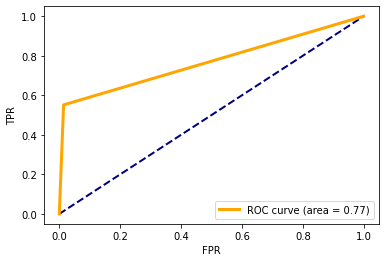

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc4=RandomForestClassifier(n_estimators=25,max_depth=8,criterion='gini')
score_model(rfc4,x_train,x_test,y_train,y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


[[33512   484]
 [11932 22064]]
0.817390281209554
0.6490175314742911
0.97853468156821
0.7804187889077532
[[14379   237]
 [  669   787]]
0.9436286709805873
0.540521978021978
0.7685546875
0.6346774193548387


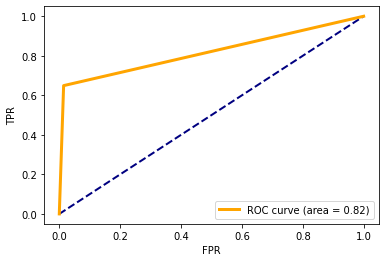

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc4=RandomForestClassifier(n_estimators=25,max_depth=8,criterion='gini')
score_model(rfc4,re_x_train,x_test,re_y_train,y_test)

[[3077  383]
 [1407 2077]]
0.7422235023041475
0.5961538461538461
0.8443089430894309
0.6988559892328399
[[1324  176]
 [ 656  820]]
0.7204301075268817
0.5555555555555556
0.8232931726907631
0.6634304207119741


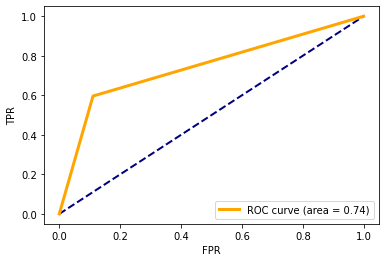

In [ ]:

rfc3=RandomForestClassifier(n_estimators=30,max_depth=6,criterion='gini')
score_model(rfc3,x_train,x_test,y_train,y_test)

[[3260  200]
 [1498 1986]]
0.7554723502304147
0.5700344431687715
0.9085086916742909
0.7005291005291004
[[1399  101]
 [ 696  780]]
0.7321908602150538
0.5284552845528455
0.8853575482406356
0.6618582944420873


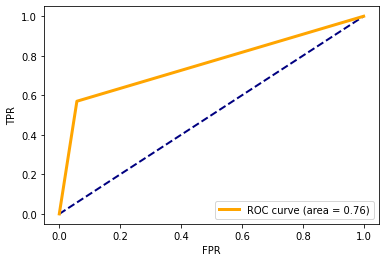

In [ ]:
rfc2=RandomForestClassifier(n_estimators=20,max_depth=5,criterion='entropy')
score_model(rfc2,x_train,x_test,y_train,y_test)

In [ ]:
rfc2=RandomForestClassifier(n_estimators=20,max_depth=5,criterion='entropy')
score_model(rfc2,x_train,x_test,y_train,y_test)

[[31506  2490]
 [13061 20935]]
0.7712819155194729
0.6158077420873044
0.8937033084311633
0.7291757370996674
[[13585  1031]
 [  635   821]]
0.8963414634146342
0.5638736263736264
0.44330453563714906
0.4963724304715841


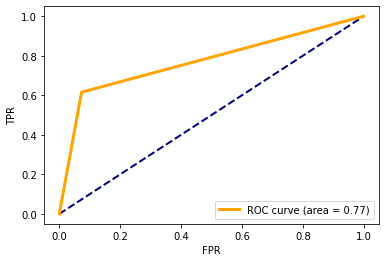

In [ ]:
rfc2=RandomForestClassifier(n_estimators=20,max_depth=5,criterion='entropy')
score_model(rfc2,re_x_train,x_test,re_y_train,y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_n82 = KNeighborsClassifier(n_neighbors=69)
score_model(knn_n82,x_train,x_test,y_train,y_test)
# more accuracy



[[33543   453]
 [ 1655  1849]]
0.9437866666666667
0.5276826484018264
0.8032145960034752
0.6369273165690664
[[14395   221]
 [  672   784]]
0.944437531110005
0.5384615384615384
0.7800995024875622
0.6371393742381146


NameError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_n82 = KNeighborsClassifier(n_neighbors=69)
score_model(knn_n82,re_x_train,x_test,re_y_train,y_test)
# more accuracy



[[16993 17003]
 [ 1778 32218]]
0.7237763266266619
0.9476997293799271
0.6545580138558745
0.7743129408654481
[[7077 7539]
 [ 315 1141]]
0.5113240418118467
0.7836538461538461
0.1314516129032258
0.2251381215469613


NameError: ignored

[[2924  536]
 [1331 2153]]
0.7311347926267281
0.6179678530424799
0.8006693938267013
0.6975538635995464
[[1266  234]
 [ 626  850]]
0.7110215053763441
0.575880758807588
0.7841328413284133
0.6640625000000001


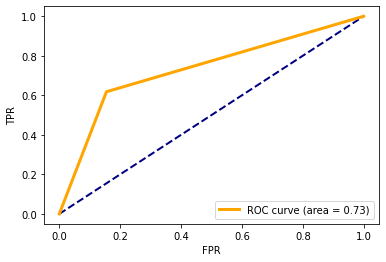

In [ ]:
knn_n82 = KNeighborsClassifier(n_neighbors=69)
score_model(knn_n82,x_train,x_test,y_train,y_test)
# more accuracy



In [ ]:
x_train

,x0_Ads,x0_Direct,x0_SEO,x1_Cash On Delivery,x1_Credit Card,x1_Debit Card,x1_E-wallet,x1_Internet Banking,x2_F,x2_M,...,x8_24,x8_25,x8_26,x8_27,x8_28,x8_29,x8_30,x8_31,Order_Value_USD,Age
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.876704,1.080420
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.148476,-0.119739
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.048349,-1.319899
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.650227,-0.479787
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.501302,0.360324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.695522,2.160564
6940,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.057885,-0.119739
6941,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.057885,1.200436
6942,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.210385,-0.359771


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


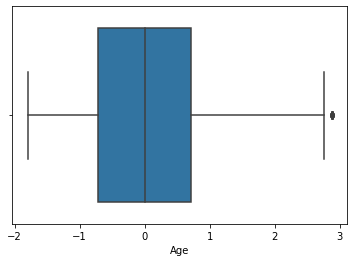

In [ ]:
sns.boxplot(x_train['Age'],data=x_train)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


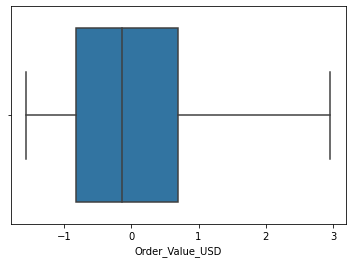

In [ ]:
sns.boxplot(x_train['Order_Value_USD'],data=x_train)


In [ ]:
print(x_train.shape)
print(x_test.shape)

(6944, 96)
(2976, 96)


In [ ]:
rfc7=RandomForestClassifier(n_estimators=49,max_depth=10,criterion='entropy')
get_predictions(rfc7,x_train,x_test,y_train,y_test)


[[3421   39]
 [1584 1900]]
0.7662730414746544
0.5453501722158438
0.9798865394533265
0.700719159137009
[[1477   23]
 [ 729  747]]
0.7473118279569892
0.5060975609756098
0.9701298701298702
0.6651825467497774


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc7=RandomForestClassifier(n_estimators=49,max_depth=10,criterion='entropy')
get_predictions(rfc7,re_x_train,x_test,re_y_train,y_test)


[[33522   474]
 [11902 22094]]
0.8179785857159666
0.6498999882339098
0.9789968096419709
0.78120359239092
[[14388   228]
 [  670   786]]
0.944126431060229
0.5398351648351648
0.7751479289940828
0.6364372469635626


In [ ]:
rfc7=RandomForestClassifier(n_estimators=49,max_depth=10,criterion='entropy')
get_predictions(rfc7,x_train,x_test,y_train,y_test)


[[3421   39]
 [1565 1919]]
0.7690092165898618
0.5508036739380023
0.9800817160367722
0.705255420801176
[[1474   26]
 [ 727  749]]
0.7469758064516129
0.5074525745257452
0.9664516129032258
0.665482007996446


In [ ]:
model15=XGBClassifier(colsample_bytree=0.4, gamma=0.2, min_child_weight=3)
get_predictions(model15,x_train,x_test,y_train,y_test)### best

[[3419   41]
 [1586 1898]]
0.7656970046082949
0.5447761194029851
0.9788550799381124
0.6999815600221281
[[1474   26]
 [ 728  748]]
0.7466397849462365
0.5067750677506775
0.9664082687338501
0.664888888888889


In [ ]:
import xgboost as xgb


In [ ]:
print()

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:
import matplotlib.pyplot as plt


[[3424   36]
 [1579 1905]]
0.7674251152073732
0.5467853042479908
0.98145285935085
0.7023041474654377
[[1473   27]
 [ 724  752]]
0.7476478494623656
0.5094850948509485
0.9653401797175867
0.6669623059866963


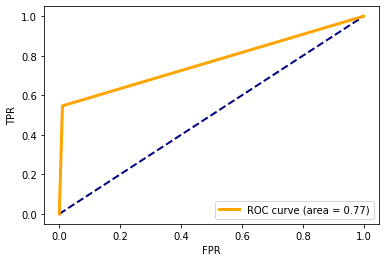

In [ ]:
xgb1=XGBClassifier()
score_model(xgb1,x_train,x_test,y_train,y_test)

In [ ]:
# impotance
importances=xgb1.feature_importances_
# its make the all important features in the aasending order
indices = np.argsort(importances)[::-1]
ind_name=x_train.columns
df=pd.DataFrame([ind_name[indices],np.sort(importances)[::-1]])
df

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,x4_01,x7_05,x7_01,x5_06,x5_29,x5_16,x4_10,x7_02,x8_29,x4_02,...,x8_02,x8_12,x8_10,x4_11,x4_12,x5_13,x5_11,x5_27,x5_05,x5_28
1,0.608589,0.012781,0.012126,0.011663,0.00992,0.009845,0.009726,0.008602,0.008351,0.007979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_train1=x_train.copy()
x_test1=x_test.copy()
test1=test.copy()

In [ ]:
x_train1.drop(['x7_02',	'x6_2018',	'x8_16',	'x5_29',	'x5_26',	'x8_22',	'x5_01',	'x5_03'	,'x8_10',	'x5_22'],axis=1,inplace=True)

In [ ]:
x_test1.drop(['x7_02',	'x6_2018',	'x8_16',	'x5_29',	'x5_26',	'x8_22',	'x5_01',	'x5_03'	,'x8_10',	'x5_22'],axis=1,inplace=True)

In [ ]:
test1.drop(['x7_02',	'x6_2018',	'x8_16',	'x5_29',	'x5_26',	'x8_22',	'x5_01',	'x5_03'	,'x8_10',	'x5_22'],axis=1,inplace=True)

In [ ]:
score_model(knn_n43,x_train1,x_test1,y_train,y_test)
score_model(xgb1,x_train1,x_test1,y_train,y_test)

NameError: ignored

[[2936  524]
 [1317 2167]]
0.7348790322580645
0.6219862227324914
0.8052768487551096
0.7018623481781375
[[1268  232]
 [ 628  848]]
0.7110215053763441
0.5745257452574526
0.7851851851851852
0.6635367762128326


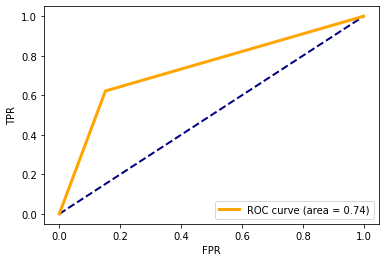

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

knn_n43 = KNeighborsClassifier(n_neighbors=43)

score_model(knn_n43,x_train,x_test,y_train,y_test)

In [ ]:
test_x=pd.read_csv('/content/drive/MyDrive/mith121/test_data/test.csv')

In [ ]:
test_x

,Merchant_ID
0,53637
1,243517
2,343640
3,69889
4,125706
...,...
13549,279884
13550,206253
13551,313049
13552,304081


In [ ]:
xgb1=XGBClassifier()
get_predictions(xgb1,x_train,x_test,y_train,y_test)

[[3424   36]
 [1579 1905]]
0.7674251152073732
0.5467853042479908
0.98145285935085
0.7023041474654377
[[1473   27]
 [ 724  752]]
0.7476478494623656
0.5094850948509485
0.9653401797175867
0.6669623059866963


In [ ]:
test_x.columns

Index(['Merchant_ID'], dtype='object')

In [ ]:
test_pred=rfc7.predict(test)

In [ ]:
train.columns

Index(['Order_Value_USD', 'Order_Source', 'Order_Payment_Method', 'Fraudster',
       'Gender', 'Age', 'order_year', 'order_month', 'orderd_date',
       'merch_joined_year', 'merch_joined_month', 'merch_joined_date'],
      dtype='object')

In [ ]:
test_x['Fraudster']=test_pred

ValueError: ignored

In [ ]:
test_x['Merchant_ID'] = test_x['Merchant_ID'].astype(str)
test_x = test_x[['Merchant_ID', 'Fraudster']]
test_x = test_x.rename(columns={'Merchant_ID': 'Merchant_ID', 'Fraudster': 'Fraudster'})

In [ ]:
test_x

In [ ]:
from pandas.core.arrays.interval import value_counts
test_x['Fraudster'].value_counts()

KeyError: ignored

In [ ]:
test_x.to_csv('mith_trail_4.csv', index=False)

In [ ]:
#nuralnetwork

In [ ]:
import pandas as pd
import numpy as np

import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import BatchNormalization
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

from keras.models import Sequential, Model
from keras.layers import Dense, Input
#from keras.layers.normalization import BatchNormalization
#from keras.utils import to_categorical

import matplotlib.pyplot as plt

In [ ]:
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model



In [ ]:
from tensorflow.keras import Sequential, layers
model23= keras.Sequential()


In [ ]:
x_train.shape

(37500, 96)

In [ ]:
y_train.shape

(37500,)

In [ ]:
model23.add(Dense(10, activation='sigmoid',input_shape=(96,)))
Dropout(0.5)
BatchNormalization()
model23.add(Dense(5,activation='sigmoid'))
Dropout(0.7)
BatchNormalization()
model23.add(Dense(1,activation='sigmoid'))

In [ ]:
model23.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:


result23=model23.fit(x_train,y_train,batch_size=10,epochs=20)

Epoch 1/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3143 - accuracy: 0.9066
Epoch 2/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3045 - accuracy: 0.9066
Epoch 3/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2995 - accuracy: 0.9066
Epoch 4/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2917 - accuracy: 0.9066
Epoch 5/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2802 - accuracy: 0.9066
Epoch 6/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2654 - accuracy: 0.9066
Epoch 7/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2501 - accuracy: 0.9066
Epoch 8/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2372 - accuracy: 0.9066
Epoch 9/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2279 - accuracy: 0.9152
Epoch 10/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.221

In [ ]:
train_preds=model23.predict(x_train)>0.5

1172/1172 [==============================] - 5s 4ms/step


In [ ]:
test_preds=model23.predict(x_test)>0.5

503/503 [==============================] - 2s 4ms/step


In [ ]:

  print(confusion_matrix(y_train,train_preds))
  print(accuracy_score(y_train,train_preds))
  print(recall_score(y_train,train_preds))
  print(precision_score(y_train,train_preds))
  print(f1_score(y_train,train_preds))

  print(confusion_matrix(y_test,test_preds))
  print(accuracy_score(y_test,test_preds))
  print(recall_score(y_test,test_preds))
  print(precision_score(y_test,test_preds))
  print(f1_score(y_test,test_preds))


[[33519   477]
 [ 1652  1852]]
0.9432266666666667
0.5285388127853882
0.7951910691283813
0.6350077147265558
[[14386   230]
 [  670   786]]
0.9440019910403186
0.5398351648351648
0.7736220472440944
0.6359223300970874
